# Imports

In [1]:
import warnings

import pandas as pd

from functions.loading import load_data

from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Parameters definition

In [2]:
# Training parameters
restricted_features=True
save=True,

targets = ["cf1_log","cf2_log","cf3_log", "cf123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "revenue_log",
            "employees_log",
            "asset_log",
            "nppe_log",
            "capex_log",
            "age",
            "cap_inten",
            "gmar",
            "leverage",
            "price",
            "fuel_intensity",
            "fiscal_year",
            "energy_consumed_log",
            "energy_produced_log",
            "intan_log",
            "accu_dep_log",
            "cogs_log",
        ],
    "selec_sect":["gics_sub_ind", "gics_ind", "gics_group"],
    "cross_val": False,
}

# paths
path_rawdata = 'data/raw_data/'
path_benchmark = 'benchmark/'

if restricted_features == False:
    path_intermediary = 'data/intermediary_data/unrestricted_features/'
    path_models = 'models/unrestricted_features/'
    path_results = 'results/unrestricted_features/'
    path_plot = path_results +'plot/'

elif restricted_features == True:
    path_intermediary = 'data/intermediary_data/restricted_features/'
    path_models = 'models/restricted_features/'
    path_results = 'results/restricted_features/'
    path_plot = path_results +'plot/'


# Results containers
summary_final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

# Data Loading 

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

# Training pipeline 

INFO:functions.training_pipeline:Training for target: cf1_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf1_log: 28.48 seconds
INFO:functions.training_pipeline:Training for target: cf2_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf2_log: 130.44 seconds
INFO:functions.training_pipeline:Training for target: cf3_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf3_log: 27.70 seconds
INFO:functions.training_pipeline:Training for target: cf123_log


Using pre created preprocessed files


INFO:functions.training_pipeline:Preprocessing done
INFO:functions.training_pipeline:Training model: xgboost
INFO:functions.training_pipeline:Training model: catboost
INFO:functions.training_pipeline:Training model: lgbm
INFO:functions.training_pipeline:Modelisation done
INFO:functions.training_pipeline:Elapsed time for target cf123_log: 12.82 seconds


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

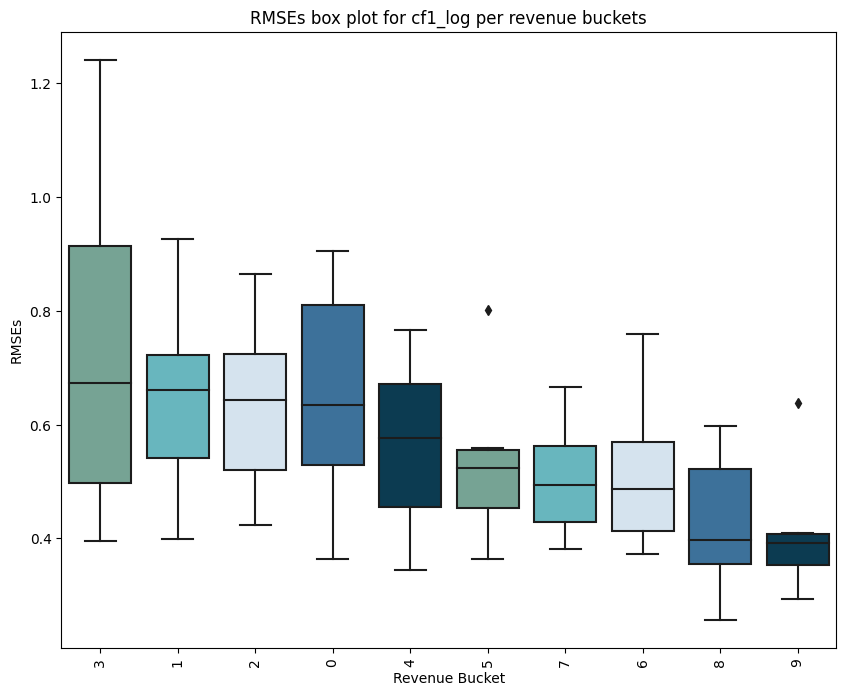

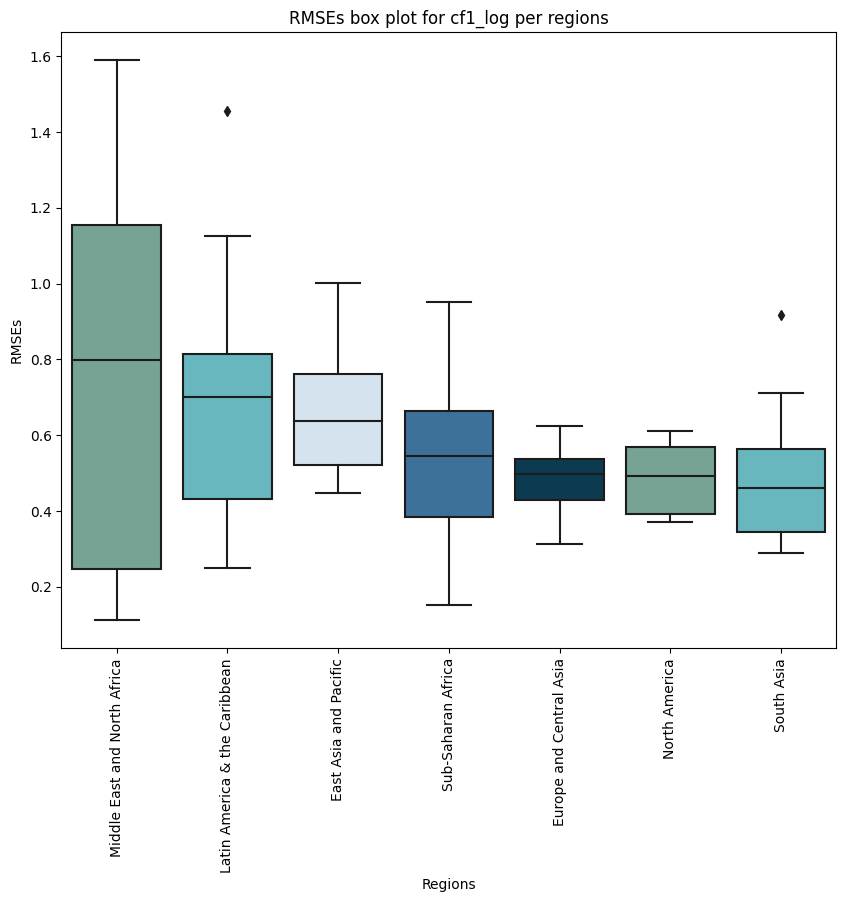

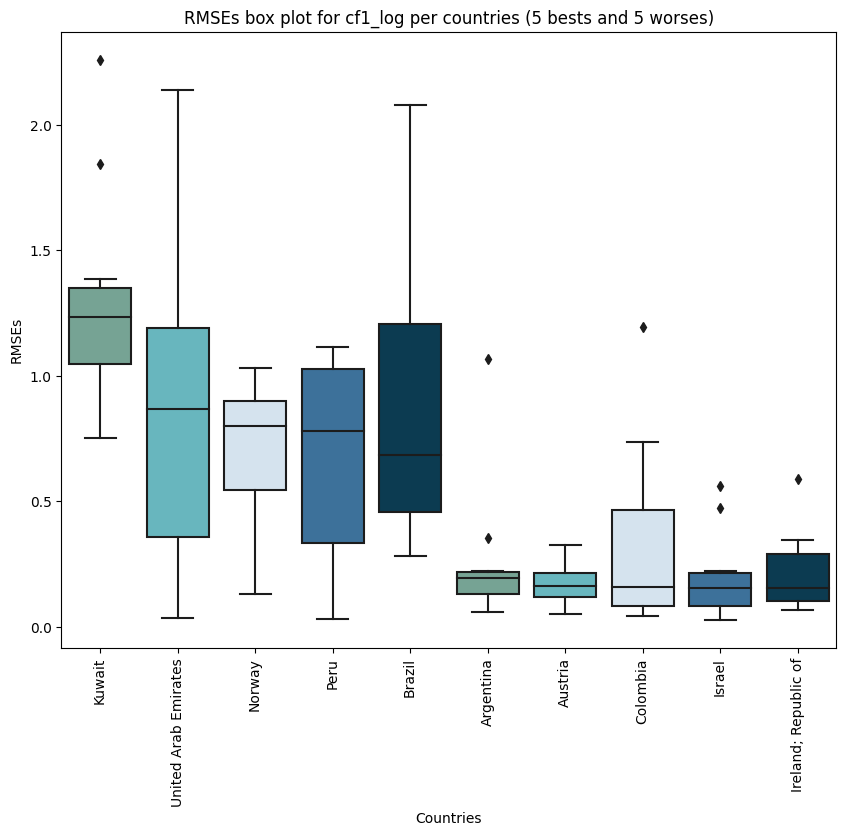

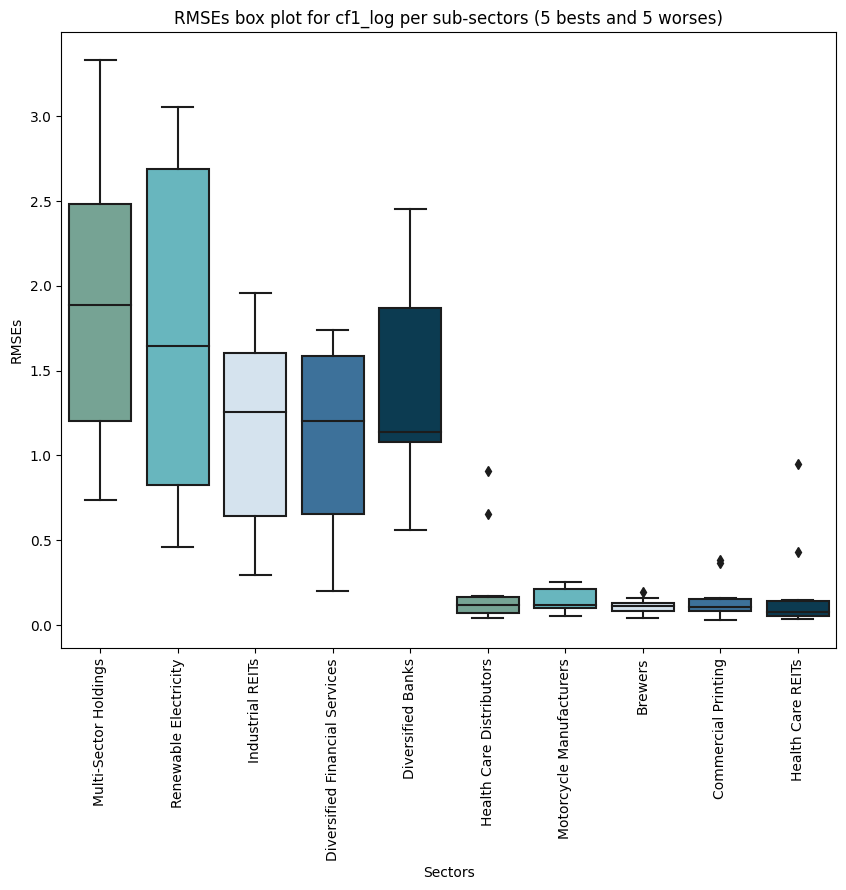

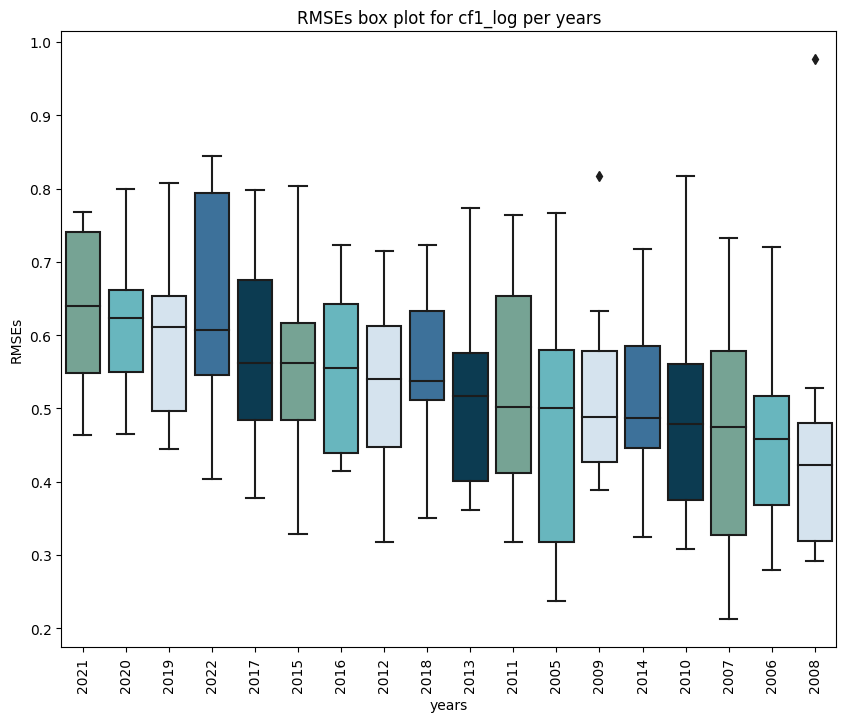

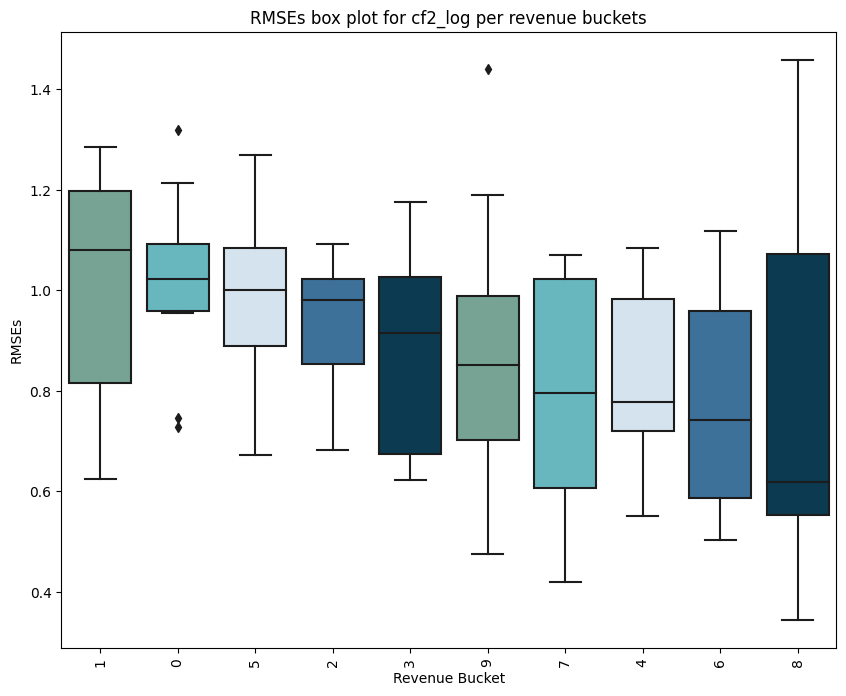

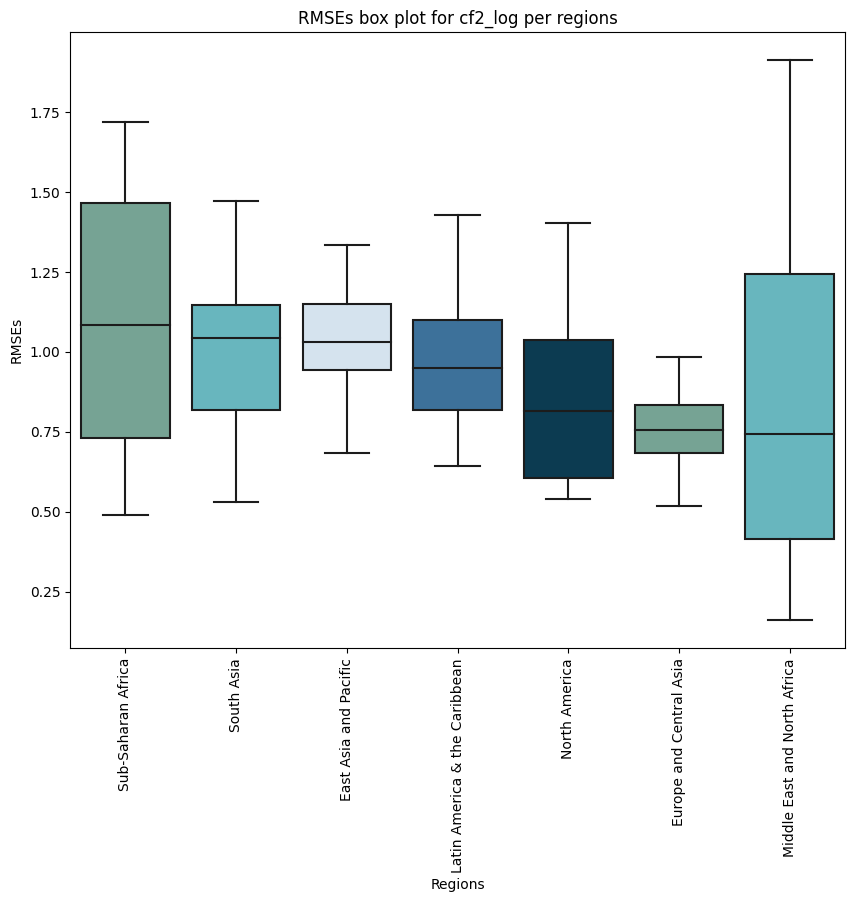

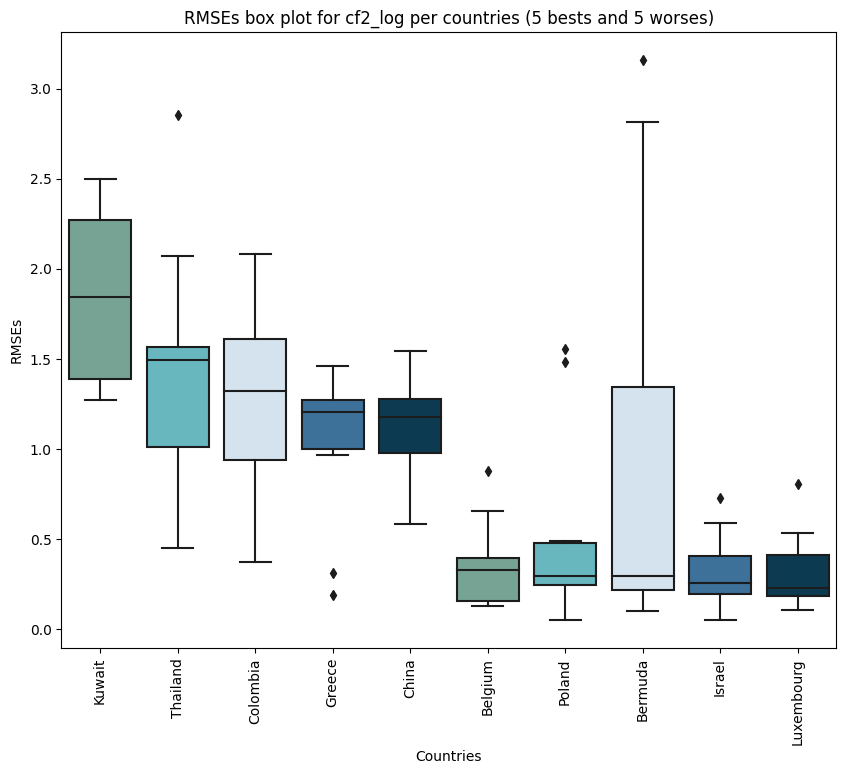

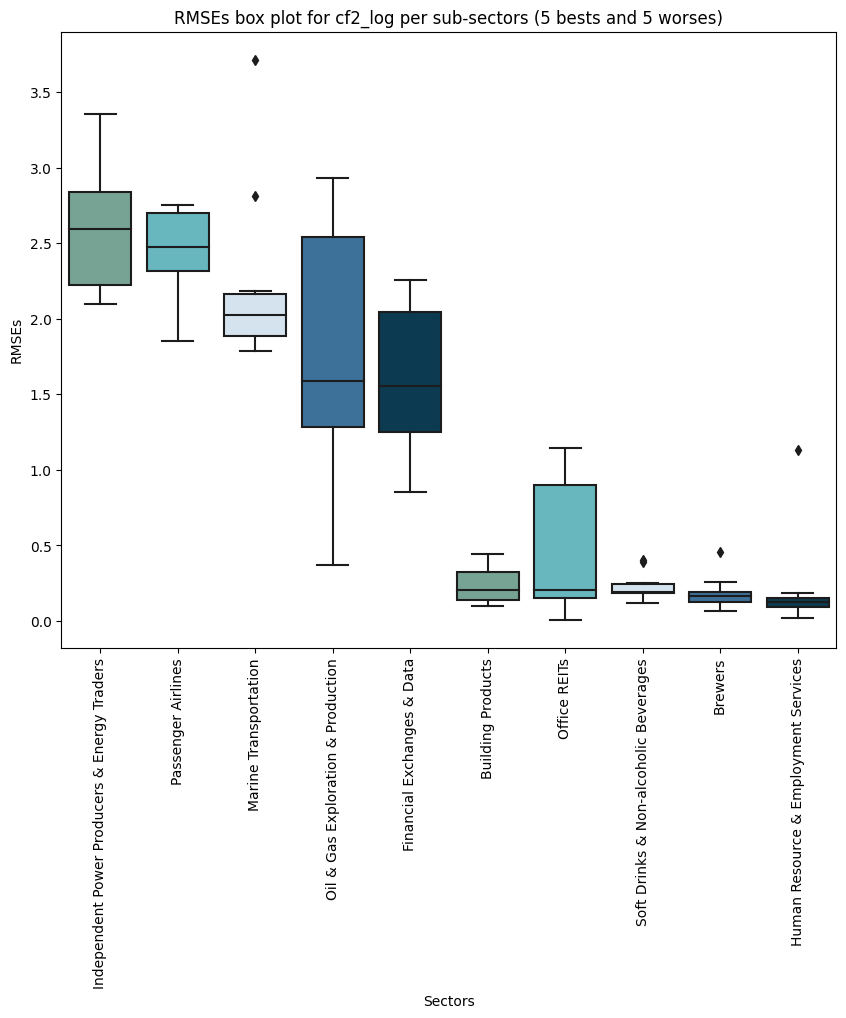

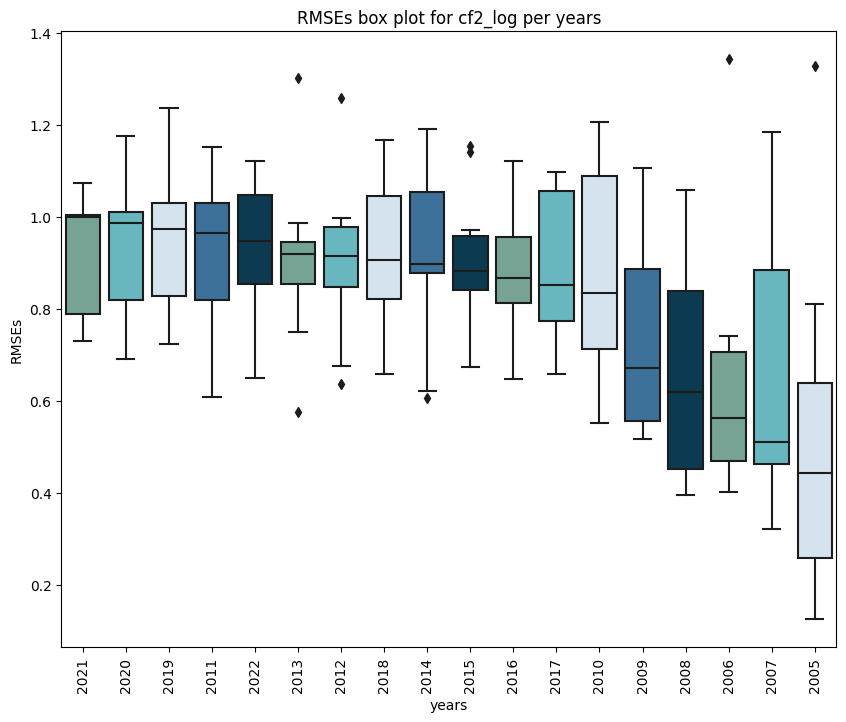

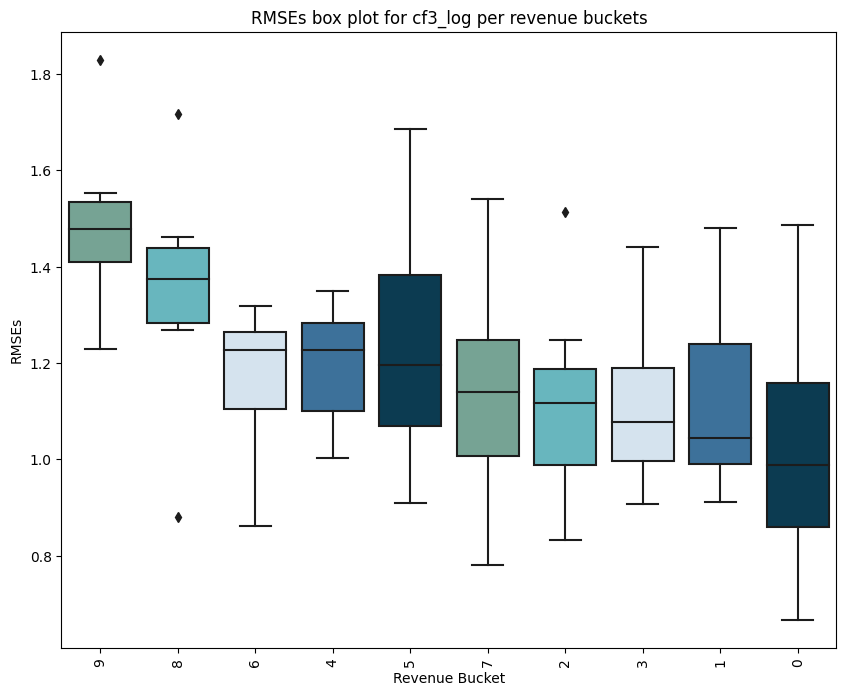

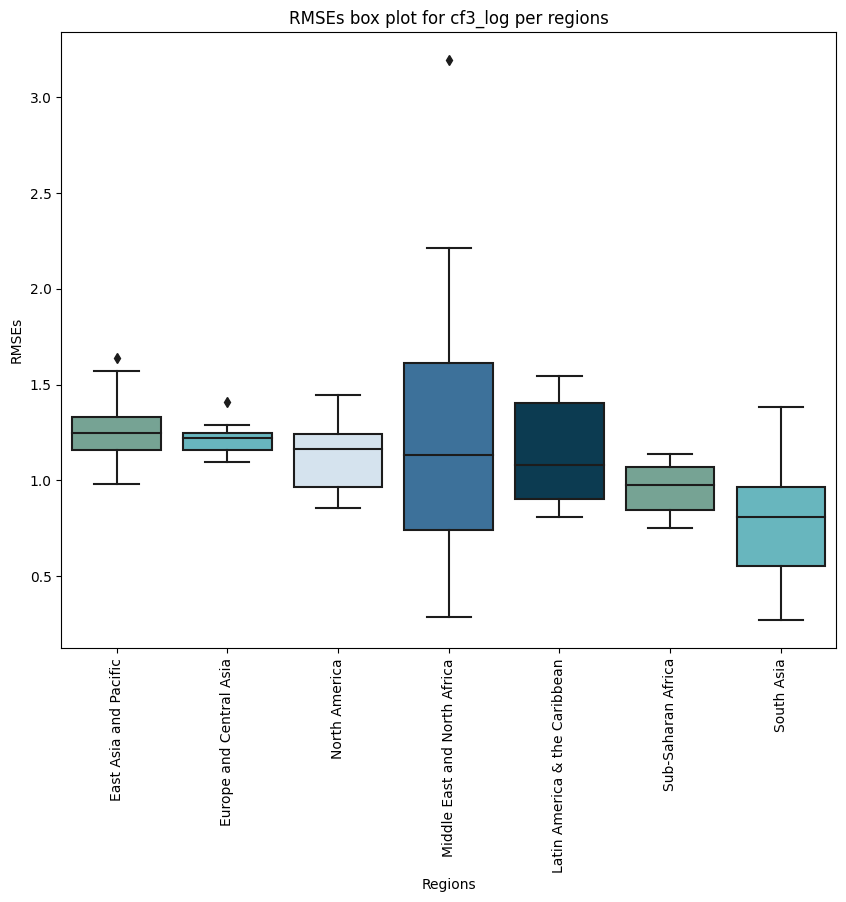

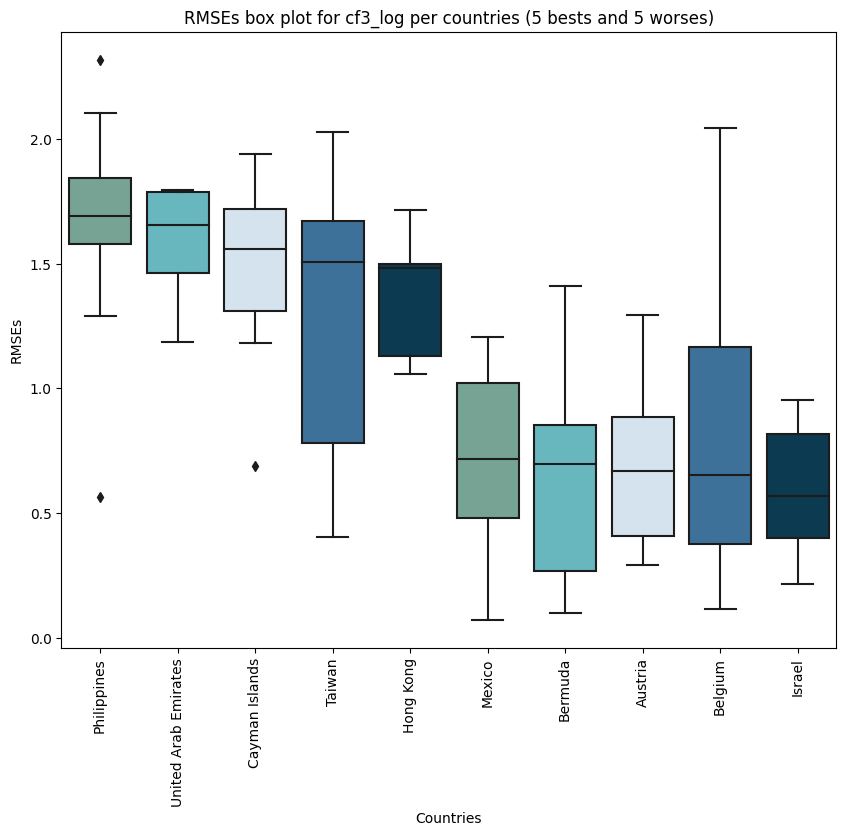

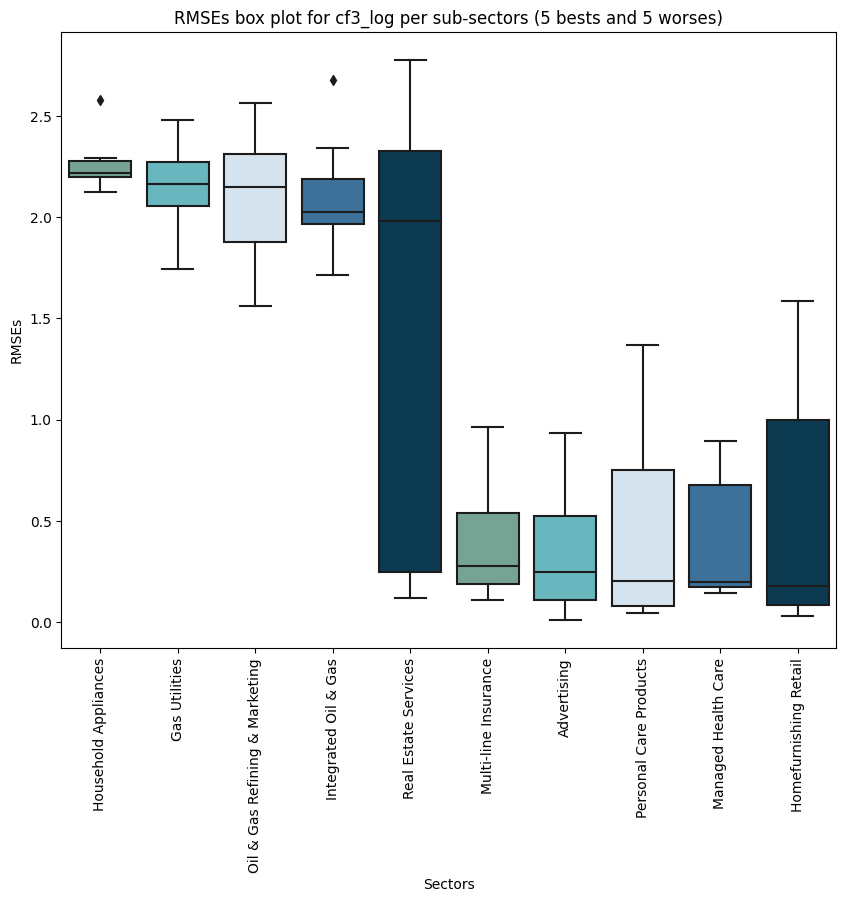

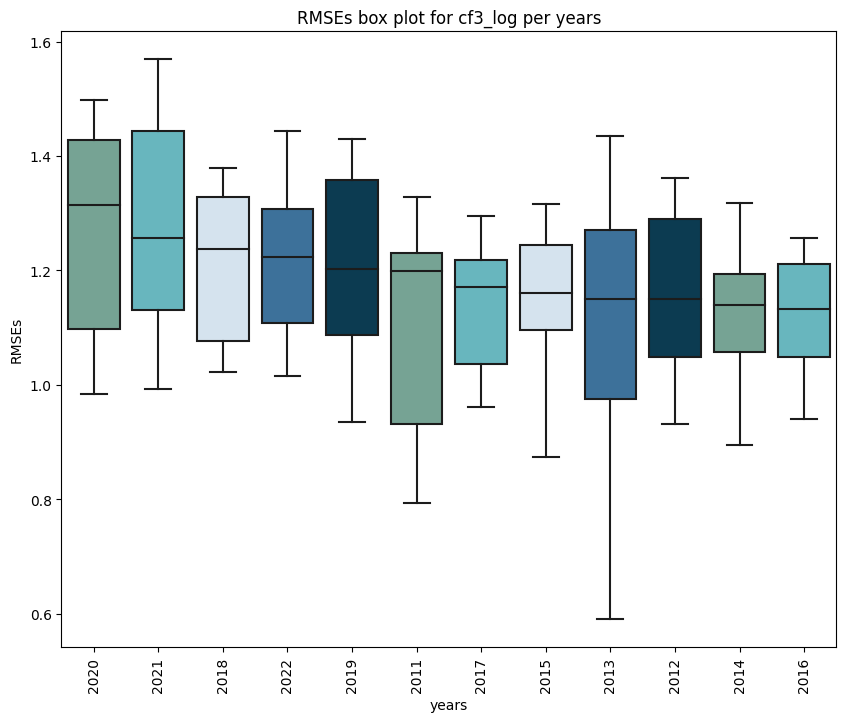

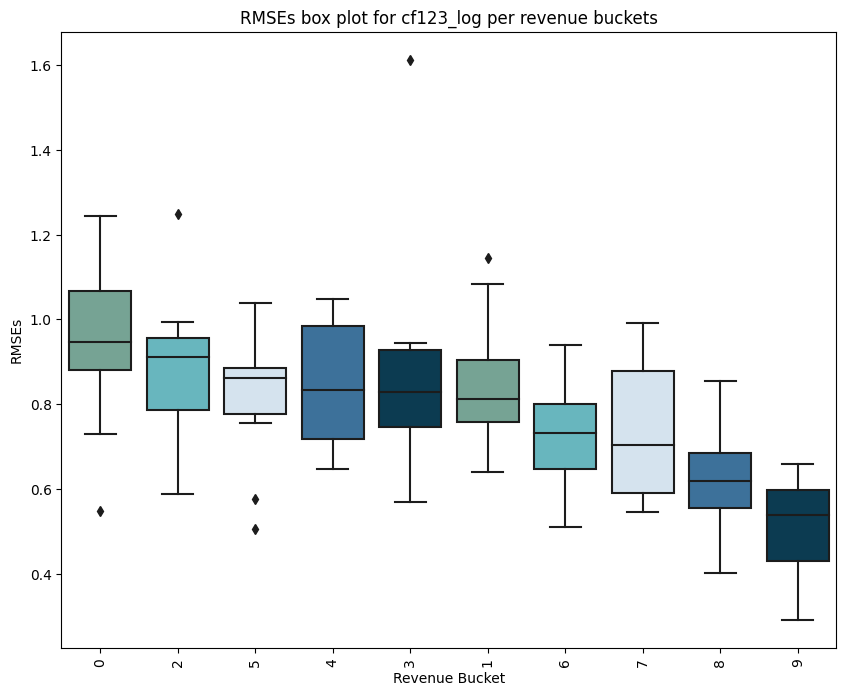

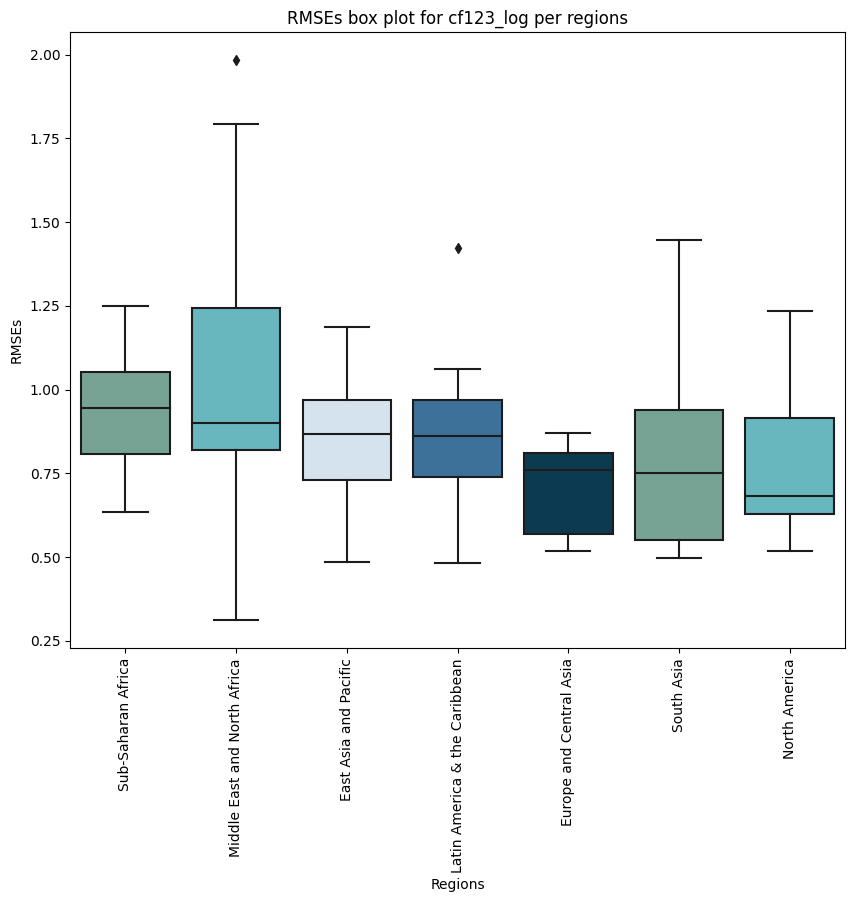

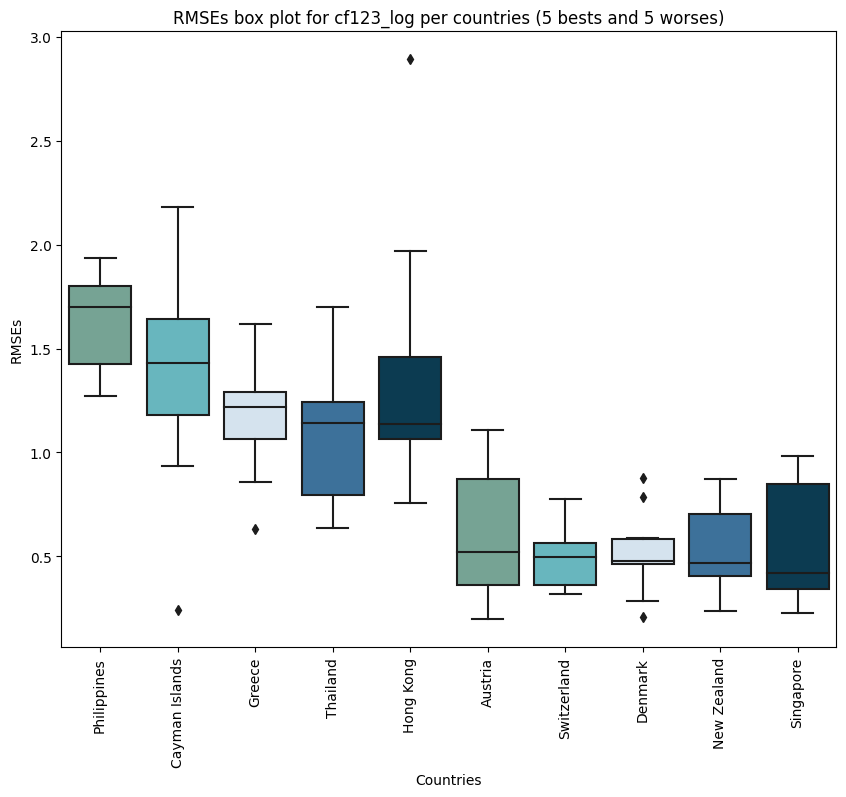

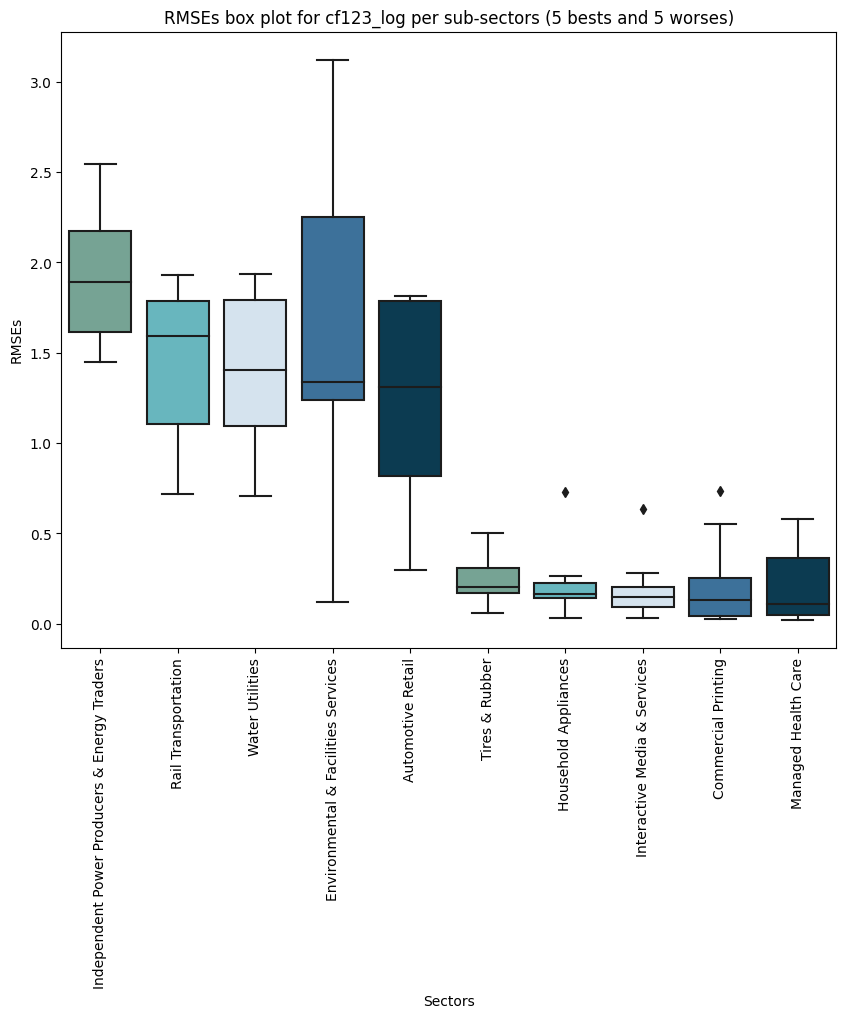

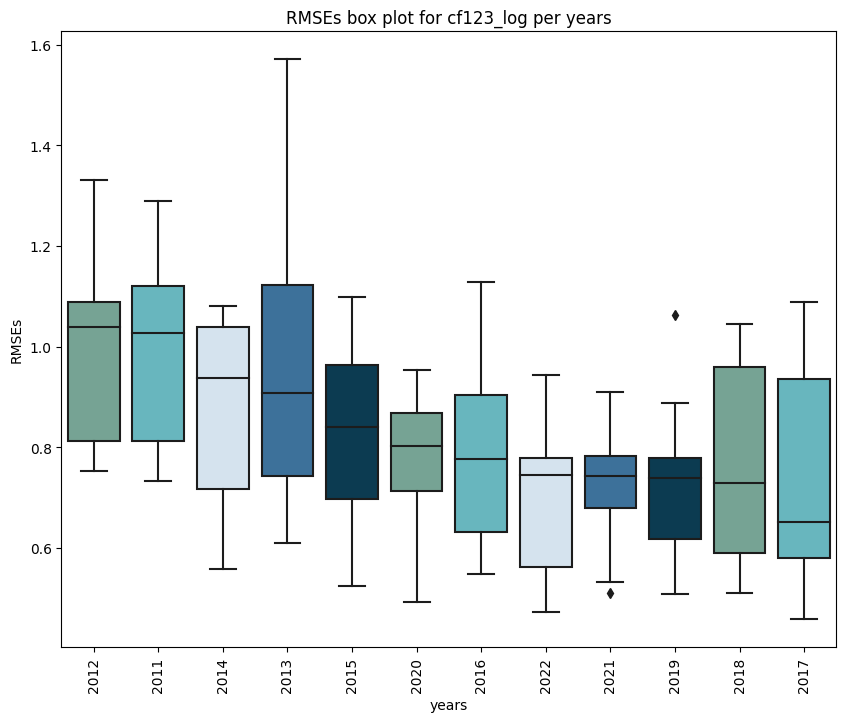

In [4]:
best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    path_benchmark=path_benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot=path_plot,
    targets=targets,
    models=models,
    summary_final=summary_final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes=estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
)

In [5]:
best_scores

[0.5834966435139407,
 0.45280968827281104,
 0.8851815971678094,
 0.5672667548475092]

# Model application

In [6]:
from functions.apply_model import apply_model_on_raw_data

In [7]:
raw_dataset = load_data(path_rawdata, filter_outliers=False, save=False)
estimations = apply_model_on_raw_data(raw_dataset,
    path_intermediary=path_intermediary,
    path_models=path_models,
    path_results=path_results,
    save=False
)
estimations

,company_id,fiscal_year,isin,ticker,gics_name,cf1_e,cf2_e,cf3_e,cf123_e,cf1_e + cf2_e + cf3_e
0,AIAS.CY,2018,CY0005200213,AIAS,Asset Management & Custody Banks,331.910904,6268.889476,2926.116019,11080.879803,20607.796202
1,AIAS.CY,2016,CY0005200213,AIAS,Asset Management & Custody Banks,648.809225,8952.217572,2905.160582,13689.660114,26195.847494
2,AIAS.CY,2015,CY0005200213,AIAS,Asset Management & Custody Banks,701.579010,9590.346400,2782.933411,15796.661958,28871.520779
3,AIAS.CY,2011,CY0005200213,AIAS,Asset Management & Custody Banks,878.527342,3993.199674,1419.115058,15814.979273,22105.821347
4,AIAS.CY,2010,CY0005200213,AIAS,Asset Management & Custody Banks,875.989240,4752.579413,564.361083,11006.777860,17199.707596
...,...,...,...,...,...,...,...,...,...,...
596972,PBYI.OQ,2021,US74587V1070,PBYI,Biotechnology,7087.022310,9898.749009,58124.793889,106875.989728,181986.554935
596973,PBYI.OQ,2020,US74587V1070,PBYI,Biotechnology,6877.951742,8247.451208,39023.172730,77052.371153,131200.946833
596974,PBYI.OQ,2019,US74587V1070,PBYI,Biotechnology,7823.064983,12196.490427,33837.464747,71888.203446,125745.223604
596975,PBYI.OQ,2018,US74587V1070,PBYI,Biotechnology,9470.183984,20777.605078,29358.716333,95165.794560,154772.299956
